### 地震数据可视化分析

#### 1.描述性统计

加载包和数据集，并查看数据集的基本属性和列的信息

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import warnings
from scipy import stats
import folium
from IPython.display import display
from geopy.geocoders import Nominatim
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches

warnings.filterwarnings("ignore")

df = pd.read_csv('database.csv')
df.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  

[5 rows x 21 columns]

In [2]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [3]:
df = df[['Date', 'Latitude', 'Longitude', 'Magnitude', 'Type']]
df.head()

Date  Latitude  Longitude  Magnitude        Type
0  01/02/1965    19.246    145.616        6.0  Earthquake
1  01/04/1965     1.863    127.352        5.8  Earthquake
2  01/05/1965   -20.579   -173.972        6.2  Earthquake
3  01/08/1965   -59.076    -23.557        5.8  Earthquake
4  01/09/1965    11.938    126.427        5.8  Earthquake

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
print(set(df['Type']))
df.head()

{'Explosion', 'Earthquake', 'Rock Burst', 'Nuclear Explosion'}


Date  Latitude  Longitude  Magnitude        Type
0  1965-01-02 00:00:00    19.246    145.616        6.0  Earthquake
1  1965-01-04 00:00:00     1.863    127.352        5.8  Earthquake
2  1965-01-05 00:00:00   -20.579   -173.972        6.2  Earthquake
3  1965-01-08 00:00:00   -59.076    -23.557        5.8  Earthquake
4  1965-01-09 00:00:00    11.938    126.427        5.8  Earthquake

In [5]:
print('Size of the Dataframe', df.shape)
eq = df[df['Type'] == 'Earthquake']
others = df[df['Type'] != 'Earthquake']

Size of the Dataframe (23412, 5)


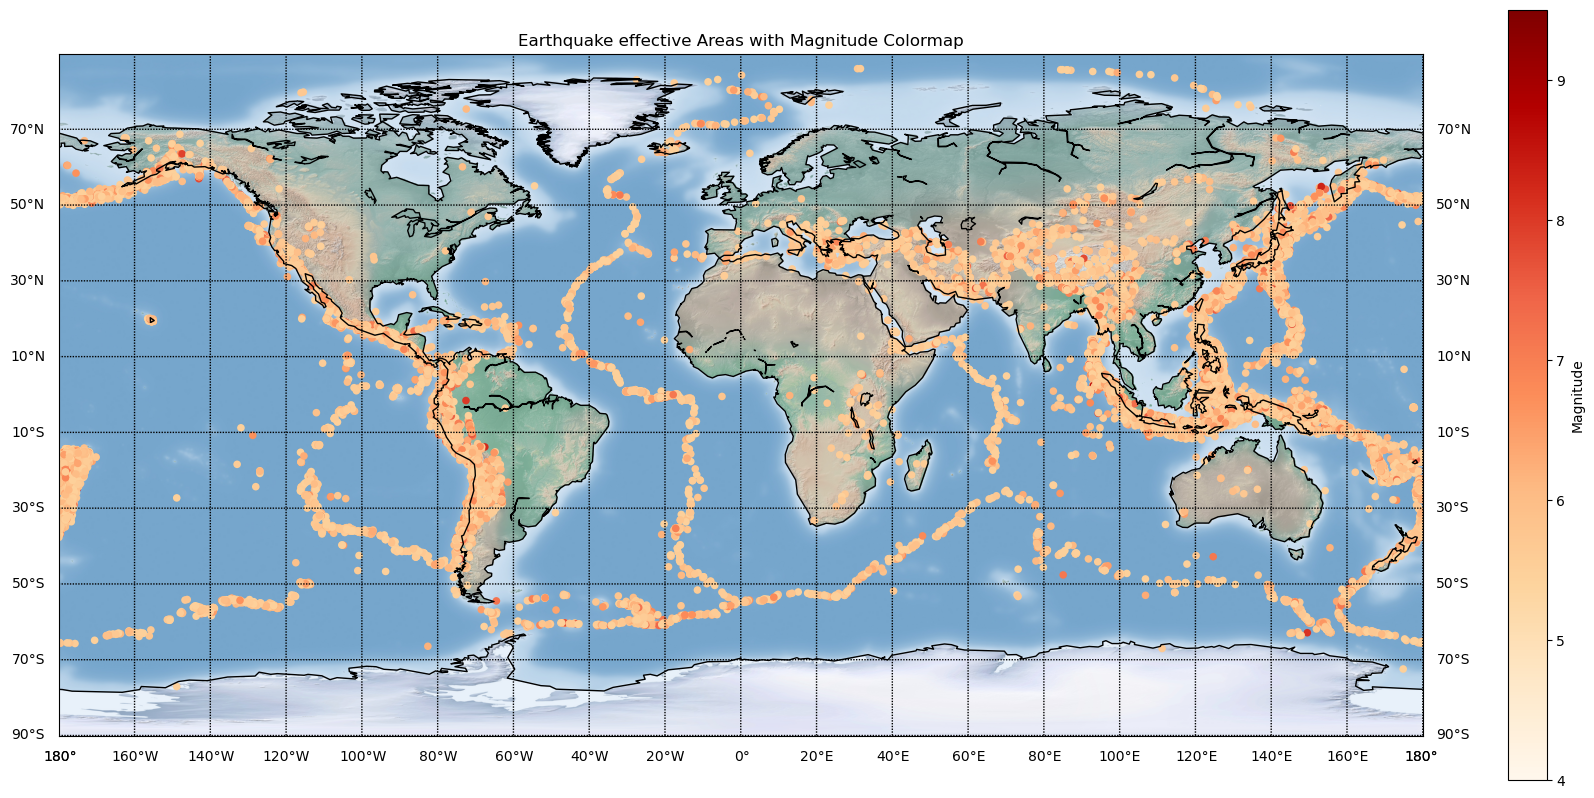

In [6]:
fig = plt.figure(figsize = (22, 20))
wmap = Basemap()
longitudes = eq['Longitude'].tolist()
latitudes = eq['Latitude'].tolist()
x_eq, y_eq = wmap(longitudes, latitudes)
wmap.drawcoastlines()
wmap.shadedrelief()
# draw parallels
wmap.drawparallels(np.arange(-90,90,20),labels=[1,1,0,1])
# draw meridians
wmap.drawmeridians(np.arange(-180,180,20),labels=[1,1,0,1])
plt.title('Earthquake effective Areas with Magnitude Colormap')
sc =wmap.scatter(x_eq, y_eq, s = 30, c = eq['Magnitude'], vmin=4, vmax =9.5, cmap='OrRd', edgecolors='none')
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label('Magnitude')
plt.show()

#### 2.可视化分析

In [7]:
df = pd.read_csv('database.csv')
df.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  

[5 rows x 21 columns]

检查缺失值

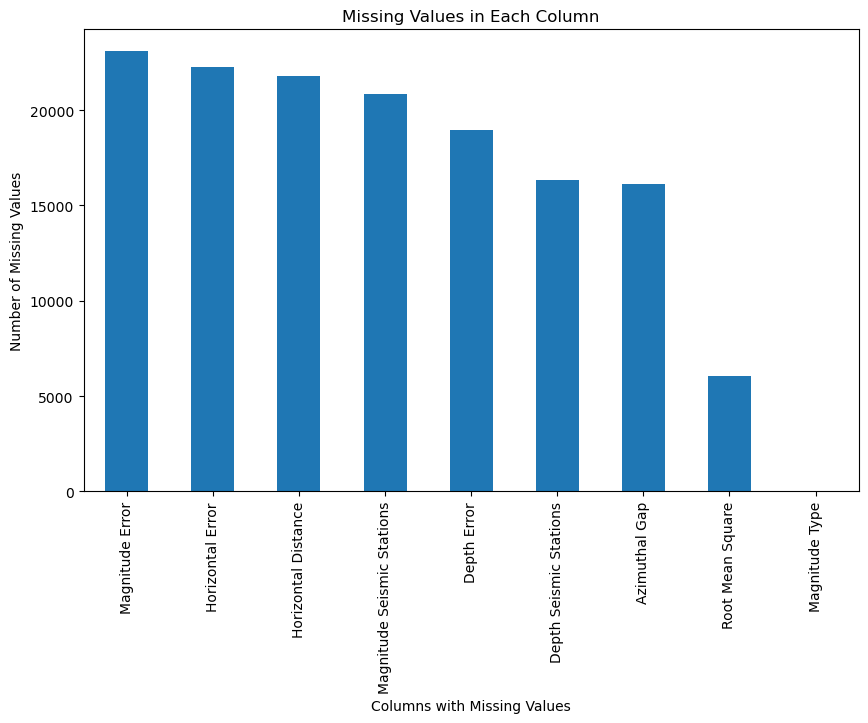

In [8]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
missing_values.plot.bar()
plt.xlabel('Columns with Missing Values')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.xticks(rotation=90)
plt.show()

In [9]:
df.info()
df.isnull().sum()

# Convert date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['Year'] = df['Date'].dt.year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

数据预处理：  
删除缺失超过20%以上的数据列，然后将剩余的连续型数值数据用中位数替代，将剩余缺失的类别数据用众数替代

In [10]:
null_counts = df.isnull().sum()

# Iterate through columns and decide whether to drop or fill
for column in df.columns:
    if null_counts[column] > df.shape[0]*0.2:
        # Drop the column if the number of nulls is greater than 10%  pf data
        df = df.drop(column, axis=1)
    else:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Fill missing numeric data with the median of the column
            median_value = df[column].median()
            df[column] = df[column].fillna(median_value)
        else:
            # Fill missing non-numeric data with the most common value
            most_common = df[column].mode().iloc[0]
            df[column] = df[column].fillna(most_common)


画一个地震级别的频数分布直方图，以直观地展示不同级别地震爆发的频率

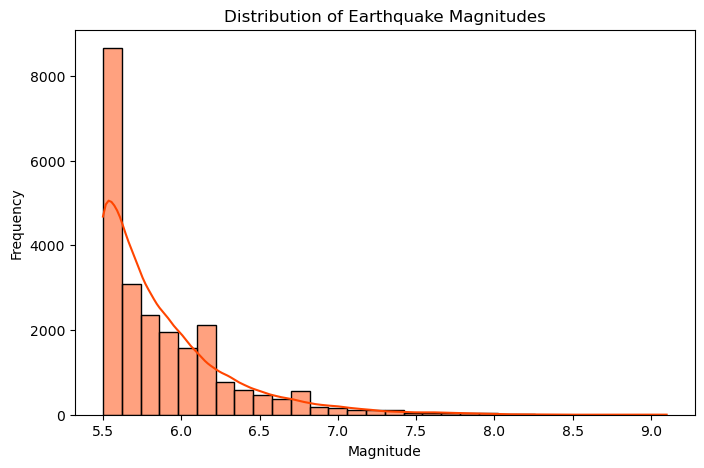

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['Magnitude'], bins=30, kde=True, color='orangered')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

然后再画出地震深度的频率分布图

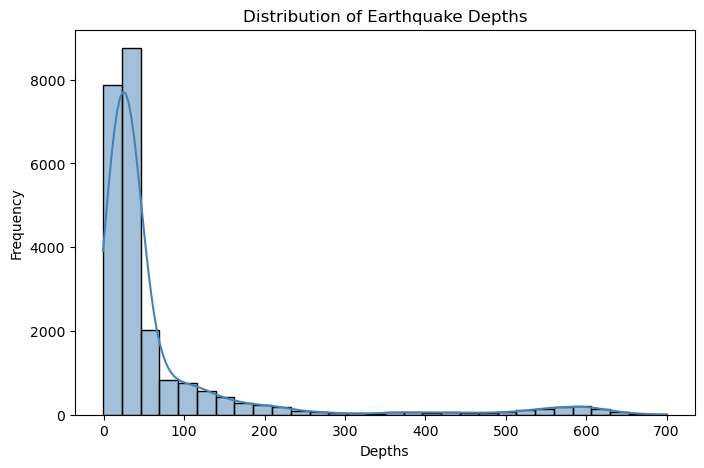

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Depth'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depths')
plt.ylabel('Frequency')
plt.show()

随后画出每年地震爆发次数的变化折线图

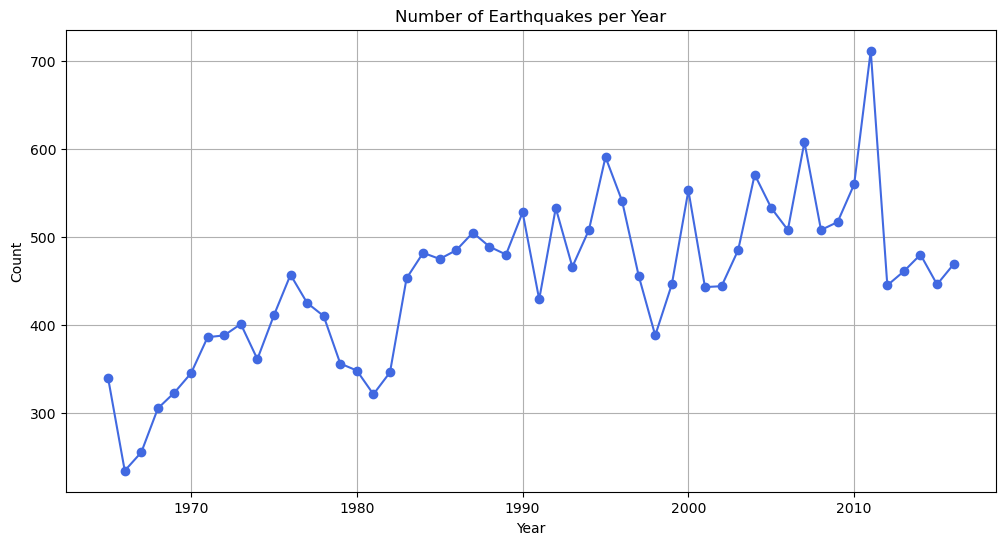

In [13]:
plt.figure(figsize=(12,6))
df['Year'].value_counts().sort_index().plot(kind='line', marker='o', color='royalblue')
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

为探讨地震深度和地震强度的关系，我们画出散点图来初步观察

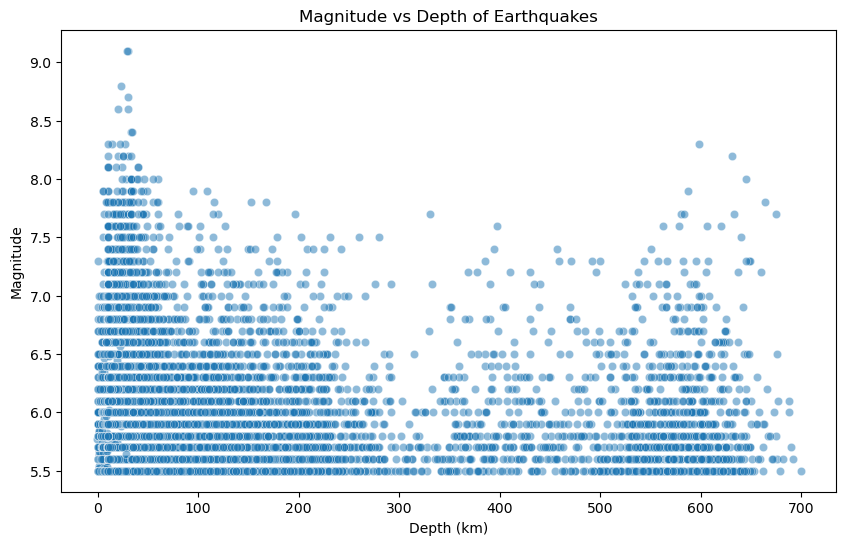

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Depth', y='Magnitude', alpha=0.5)
plt.title('Magnitude vs Depth of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

地震种类

In [15]:
df["Type"].value_counts()

Type
Earthquake           23229
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: count, dtype: int64

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.drop('Time',axis=1,inplace=True)
df.head(3)

Latitude  Longitude        Type  Depth  Magnitude Magnitude Type  \
Date                                                                           
1965-01-02    19.246    145.616  Earthquake  131.6        6.0             MW   
1965-01-04     1.863    127.352  Earthquake   80.0        5.8             MW   
1965-01-05   -20.579   -173.972  Earthquake   20.0        6.2             MW   

                      ID  Source Location Source Magnitude Source     Status  \
Date                                                                           
1965-01-02  ISCGEM860706  ISCGEM          ISCGEM           ISCGEM  Automatic   
1965-01-04  ISCGEM860737  ISCGEM          ISCGEM           ISCGEM  Automatic   
1965-01-05  ISCGEM860762  ISCGEM          ISCGEM           ISCGEM  Automatic   

            Year  
Date              
1965-01-02  1965  
1965-01-04  1965  
1965-01-05  1965

In [17]:
df.drop('ID',axis=1,inplace=True)
df.sample(3)

Latitude  Longitude        Type  Depth  Magnitude Magnitude Type  \
Date                                                                           
1996-10-19   31.8400   131.8040  Earthquake   33.0        5.5            MWC   
2014-11-20   23.5081    93.5148  Earthquake   49.0        5.6            MWB   
2008-09-05   -1.1710   -13.9550  Earthquake   10.0        5.8            MWC   

           Source Location Source Magnitude Source    Status  Year  
Date                                                                
1996-10-19     US              US              HRV  Reviewed  1996  
2014-11-20     US              US               US  Reviewed  2014  
2008-09-05     US              US               US  Reviewed  2008

在地图中绘制出地震爆发过的位置

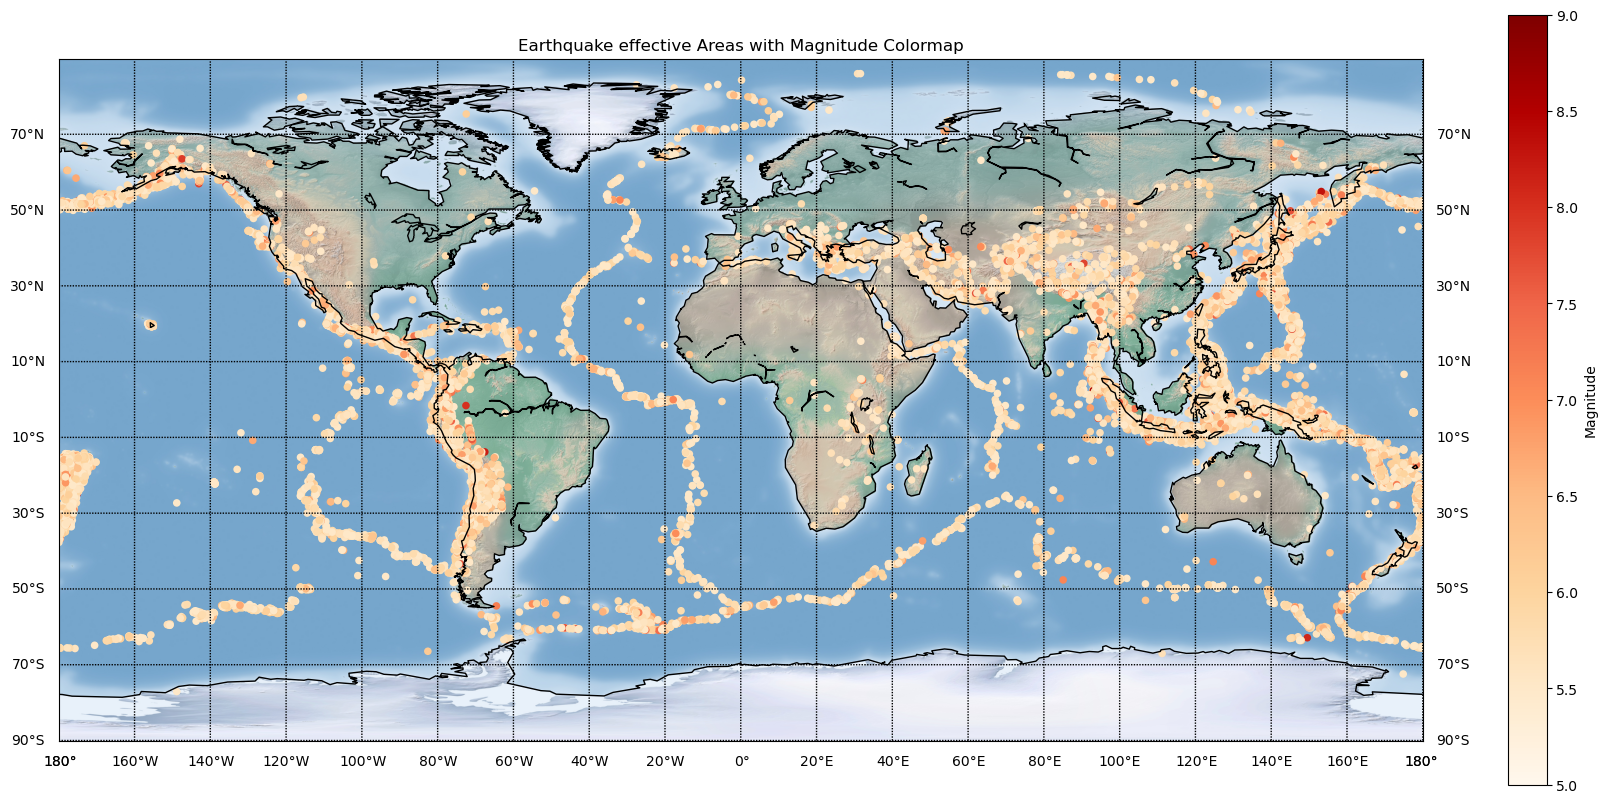

In [18]:
fig = plt.figure(figsize = (22, 20))
wmap = Basemap()
longitudes = df['Longitude'].tolist()
latitudes = df['Latitude'].tolist()
x_eq, y_eq = wmap(longitudes, latitudes)
wmap.drawcoastlines()
wmap.shadedrelief()
# draw parallels
wmap.drawparallels(np.arange(-90,90,20),labels=[1,1,0,1])
# draw meridians
wmap.drawmeridians(np.arange(-180,180,20),labels=[1,1,0,1])
plt.title('Earthquake effective Areas with Magnitude Colormap')
sc =wmap.scatter(x_eq, y_eq, s = 30, c = df['Magnitude'], vmin=5, vmax =9, cmap='OrRd', edgecolors='none')
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label('Magnitude')
plt.show()

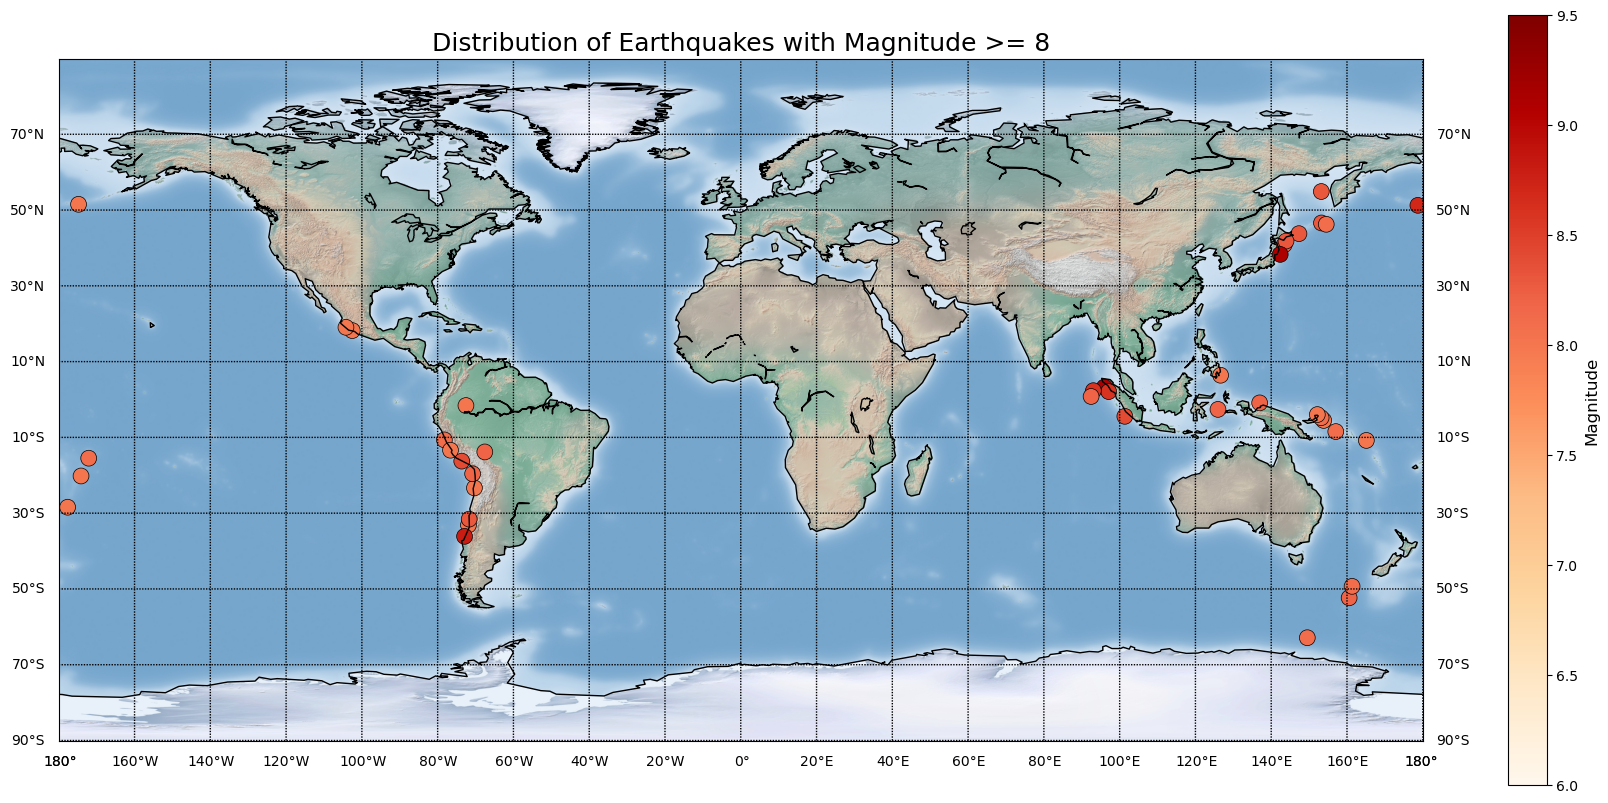

In [19]:
# 1. 首先筛选数据：只保留震级大于等于8的数据
filtered_df = df[df['Magnitude'] >= 8].copy()

fig = plt.figure(figsize=(22, 20))

# 初始化地图
wmap = Basemap()

# 2. 使用筛选后的数据提取经纬度
longitudes = filtered_df['Longitude'].tolist()
latitudes = filtered_df['Latitude'].tolist()
magnitudes = filtered_df['Magnitude'].tolist()

# 转换坐标
x_eq, y_eq = wmap(longitudes, latitudes)

# 绘制地图背景细节
wmap.drawcoastlines()
wmap.shadedrelief() # 绘制地形阴影
# 绘制纬线
wmap.drawparallels(np.arange(-90, 90, 20), labels=[1, 1, 0, 1])
# 绘制经线
wmap.drawmeridians(np.arange(-180, 180, 20), labels=[1, 1, 0, 1])

plt.title('Distribution of Earthquakes with Magnitude >= 8', fontsize=18)

# 3. 绘制散点图
sc = wmap.scatter(x_eq, y_eq, 
                  s=130, 
                  c=magnitudes, 
                  vmin=6, vmax=9.5, 
                  cmap='OrRd', 
                  edgecolors='k', linewidths=0.5)

# 添加颜色条
cbar = plt.colorbar(sc, shrink=.5)
cbar.set_label('Magnitude', fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.show()

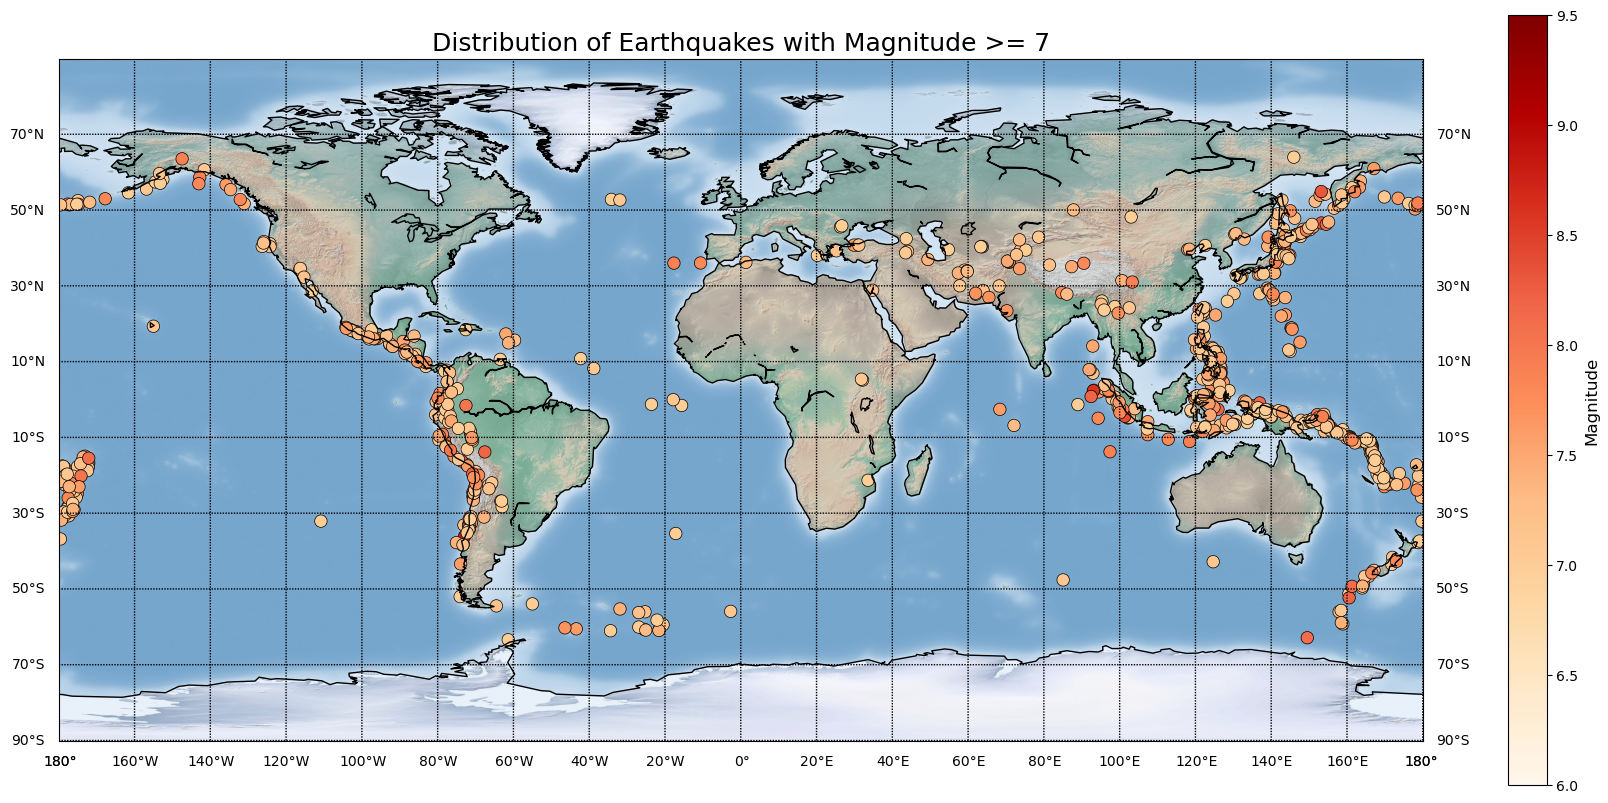

In [20]:
# 1. 首先筛选数据：只保留震级大于等于 7 的数据
filtered_df = df[df['Magnitude'] >= 7].copy()

fig = plt.figure(figsize=(22, 20))

# 初始化地图
wmap = Basemap()

# 2. 使用筛选后的数据提取经纬度
longitudes = filtered_df['Longitude'].tolist()
latitudes = filtered_df['Latitude'].tolist()
magnitudes = filtered_df['Magnitude'].tolist()

# 转换坐标
x_eq, y_eq = wmap(longitudes, latitudes)

# 绘制地图背景细节
wmap.drawcoastlines()
wmap.shadedrelief() # 绘制地形阴影
# 绘制纬线
wmap.drawparallels(np.arange(-90, 90, 20), labels=[1, 1, 0, 1])
# 绘制经线
wmap.drawmeridians(np.arange(-180, 180, 20), labels=[1, 1, 0, 1])

plt.title('Distribution of Earthquakes with Magnitude >= 7', fontsize=18)

# 3. 绘制散点图
sc = wmap.scatter(x_eq, y_eq, 
                  s=80, 
                  c=magnitudes, 
                  vmin=6, vmax=9.5, 
                  cmap='OrRd', 
                  edgecolors='k', linewidths=0.5)

# 添加颜色条
cbar = plt.colorbar(sc, shrink=.5)
cbar.set_label('Magnitude', fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.show()

#### 3.K-means聚类分析

Z分数分析以及异常值点的移除

In [21]:
data=df.copy()
data.sample(3)

Latitude  Longitude        Type  Depth  Magnitude Magnitude Type  \
Date                                                                           
1991-12-28    -6.360    150.242  Earthquake   22.4        5.9             MW   
1973-06-24    43.302    146.815  Earthquake   47.0        5.5             MB   
2003-03-31    -6.183    151.429  Earthquake   46.8        6.2            MWC   

           Source Location Source Magnitude Source    Status  Year  
Date                                                                
1991-12-28     US              US              HRV  Reviewed  1991  
1973-06-24     US              US               US  Reviewed  1973  
2003-03-31     US              US              HRV  Reviewed  2003

In [22]:
data_num = df.select_dtypes(include = ['float64', 'int64'])
data_num

Latitude  Longitude   Depth  Magnitude
Date                                              
1965-01-02   19.2460   145.6160  131.60        6.0
1965-01-04    1.8630   127.3520   80.00        5.8
1965-01-05  -20.5790  -173.9720   20.00        6.2
1965-01-08  -59.0760   -23.5570   15.00        5.8
1965-01-09   11.9380   126.4270   15.00        5.8
...              ...        ...     ...        ...
2016-12-28   38.3917  -118.8941   12.30        5.6
2016-12-28   38.3777  -118.8957    8.80        5.5
2016-12-28   36.9179   140.4262   10.00        5.9
2016-12-29   -9.0283   118.6639   79.00        6.3
2016-12-30   37.3973   141.4103   11.94        5.5

[23409 rows x 4 columns]

In [23]:
z_scores = np.abs(stats.zscore(data_num))
z_threshold = 2

# Identify and remove outliers
outliers = np.where(z_scores > z_threshold)
cleaned_data = data_num[~(z_scores > z_threshold)]

Log变换

In [24]:
data['Depth']=np.log(data['Depth']-data['Depth'].min()+1)
data['Magnitude']=np.log(data['Magnitude'])

One-Hot编码

In [25]:
data = pd.get_dummies(data=data,drop_first=True,dtype='i')
data.sample(2)

Latitude  Longitude     Depth  Magnitude  Year  Type_Explosion  \
Date                                                                         
2009-06-14    -7.686     117.20  2.949688   1.704748  2009               0   
1986-04-01    54.653     161.58  3.616309   1.722767  1986               0   

            Type_Nuclear Explosion  Type_Rock Burst  Magnitude Type_MD  \
Date                                                                     
2009-06-14                       0                0                  0   
1986-04-01                       0                0                  0   

            Magnitude Type_MH  ...  Magnitude Source_OFFICIAL  \
Date                           ...                              
2009-06-14                  0  ...                          0   
1986-04-01                  0  ...                          0   

            Magnitude Source_PAR  Magnitude Source_PGC  Magnitude Source_PR  \
Date                                                                          
2009-06-14                     0                     0                    0   
1986-04-01                     0                     0                    0   

            Magnitude Source_SE  Magnitude Source_US  \
Date                                                   
2009-06-14                    0                    0   
1986-04-01                    0                    0   

            Magnitude Source_US_GCMT  Magnitude Source_US_PGC  \
Date                                                            
2009-06-14                         0                        0   
1986-04-01                         0                        0   

            Magnitude Source_UW  Status_Reviewed  
Date                                              
2009-06-14                    0                1  
1986-04-01                    0                1  

[2 rows x 100 columns]

K-Means Clustering

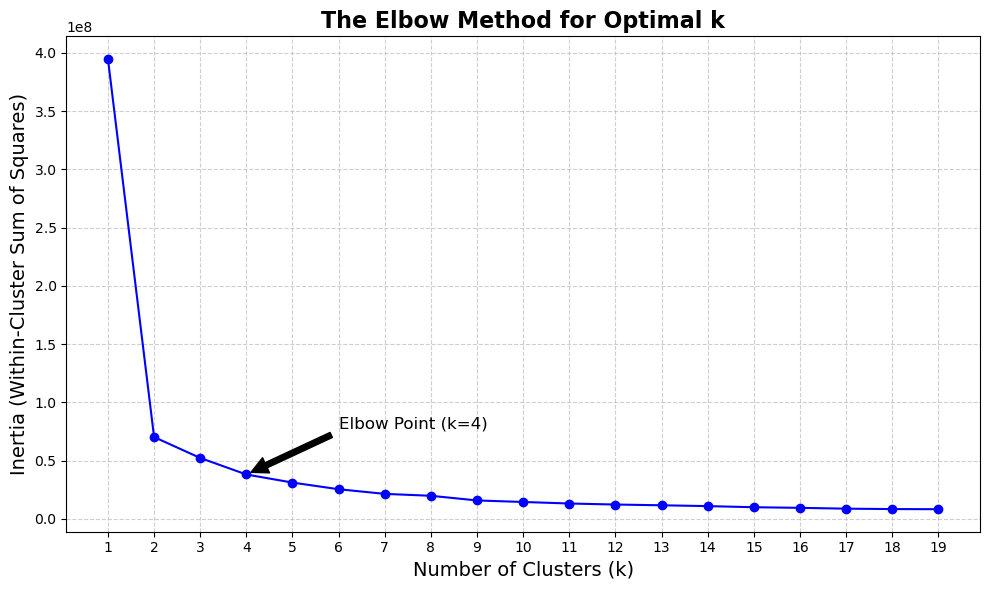

In [26]:
lo_inirtia = []
k_range = range(1, 20)

for i in k_range:
    km = KMeans(n_clusters=i, random_state=42) 
    km.fit(data)
    lo_inirtia.append(km.inertia_)

plt.figure(figsize=(10, 6), dpi=100) # 设置画布大小和分辨率

# 绘制折线图，添加数据点标记(marker)
plt.plot(k_range, lo_inirtia, marker='o', linestyle='-', color='b', markersize=6, linewidth=1.5)

# 1. 添加标题
plt.title('The Elbow Method for Optimal k', fontsize=16, fontweight='bold')

# 2. 添加坐标轴标签
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=14)

# 3. 设置X轴刻度为整数
plt.xticks(np.arange(min(k_range), max(k_range)+1, 1.0))

# 4. 添加网格线，方便定位
plt.grid(True, linestyle='--', alpha=0.6)

# 5. 标记出“肘部”位置
elbow_k = 4
elbow_val = lo_inirtia[elbow_k-1]
plt.annotate(f'Elbow Point (k={elbow_k})', 
             xy=(elbow_k, elbow_val), 
             xytext=(elbow_k+2, elbow_val+(max(lo_inirtia)/10)),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

plt.tight_layout() # 自动调整布局，防止标签被切掉
plt.show()

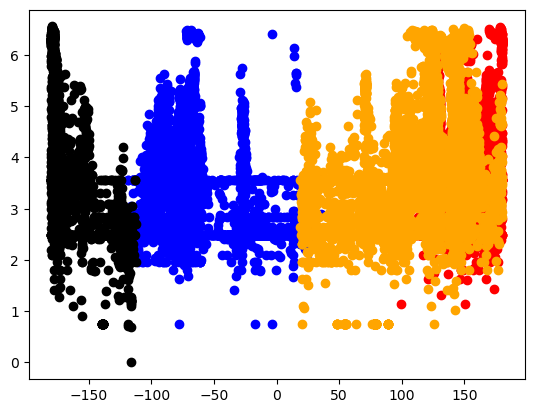

In [27]:
km = KMeans(n_clusters = 4)
prediction = km.fit_predict(data)
prediction.shape
plt.scatter(data.iloc[prediction == 0,1] , data.iloc[prediction == 0,2],color='red');
plt.scatter(data.iloc[prediction == 1,1] , data.iloc[prediction == 1,2],color='blue');
plt.scatter(data.iloc[prediction == 2,1] , data.iloc[prediction == 2,2],color='orange');
plt.scatter(data.iloc[prediction == 3,1] , data.iloc[prediction == 3,2],color='black');

In [28]:
cluster_stats = df.copy()
cluster_stats['Cluster'] = prediction
cluster_stats.head()

Latitude  Longitude        Type  Depth  Magnitude Magnitude Type  \
Date                                                                           
1965-01-02    19.246    145.616  Earthquake  131.6        6.0             MW   
1965-01-04     1.863    127.352  Earthquake   80.0        5.8             MW   
1965-01-05   -20.579   -173.972  Earthquake   20.0        6.2             MW   
1965-01-08   -59.076    -23.557  Earthquake   15.0        5.8             MW   
1965-01-09    11.938    126.427  Earthquake   15.0        5.8             MW   

            Source Location Source Magnitude Source     Status  Year  Cluster  
Date                                                                           
1965-01-02  ISCGEM          ISCGEM           ISCGEM  Automatic  1965        2  
1965-01-04  ISCGEM          ISCGEM           ISCGEM  Automatic  1965        2  
1965-01-05  ISCGEM          ISCGEM           ISCGEM  Automatic  1965        3  
1965-01-08  ISCGEM          ISCGEM           ISCGEM  Automatic  1965        1  
1965-01-09  ISCGEM          ISCGEM           ISCGEM  Automatic  1965        2

<Axes: >

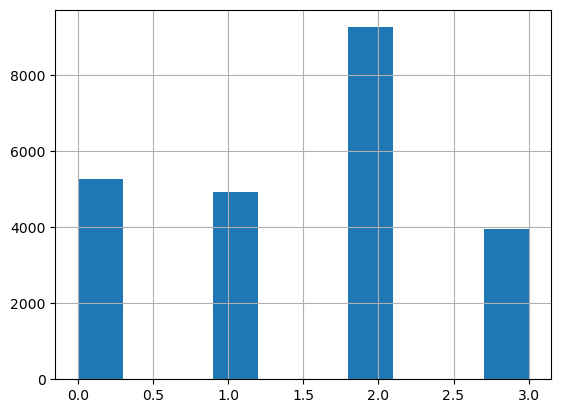

In [29]:
cluster_stats['Cluster'].hist()

In [30]:
cluster_stats['Cluster'].value_counts()

Cluster
2    9253
0    5270
1    4928
3    3958
Name: count, dtype: int64

In [31]:
cluster_stats[cluster_stats['Cluster']==1].describe()

Latitude    Longitude        Depth   Magnitude         Year  Cluster
count  4928.000000  4928.000000  4928.000000  4928.00000  4928.000000   4928.0
mean    -12.532971   -64.578305    50.582729     5.87500  1993.978693      1.0
std      29.771033    33.110489    85.903722     0.42262    14.266383      0.0
min     -66.448000  -119.333000     0.000000     5.50000  1965.000000      1.0
25%     -34.238250   -86.654500    10.000000     5.60000  1983.000000      1.0
50%     -14.535000   -71.656000    26.250000     5.70000  1995.000000      1.0
75%      11.428250   -35.124750    48.000000     6.00000  2007.000000      1.0
max      84.289000    35.495000   650.000000     8.80000  2016.000000      1.0

Cluster-Specific Earthquake Map

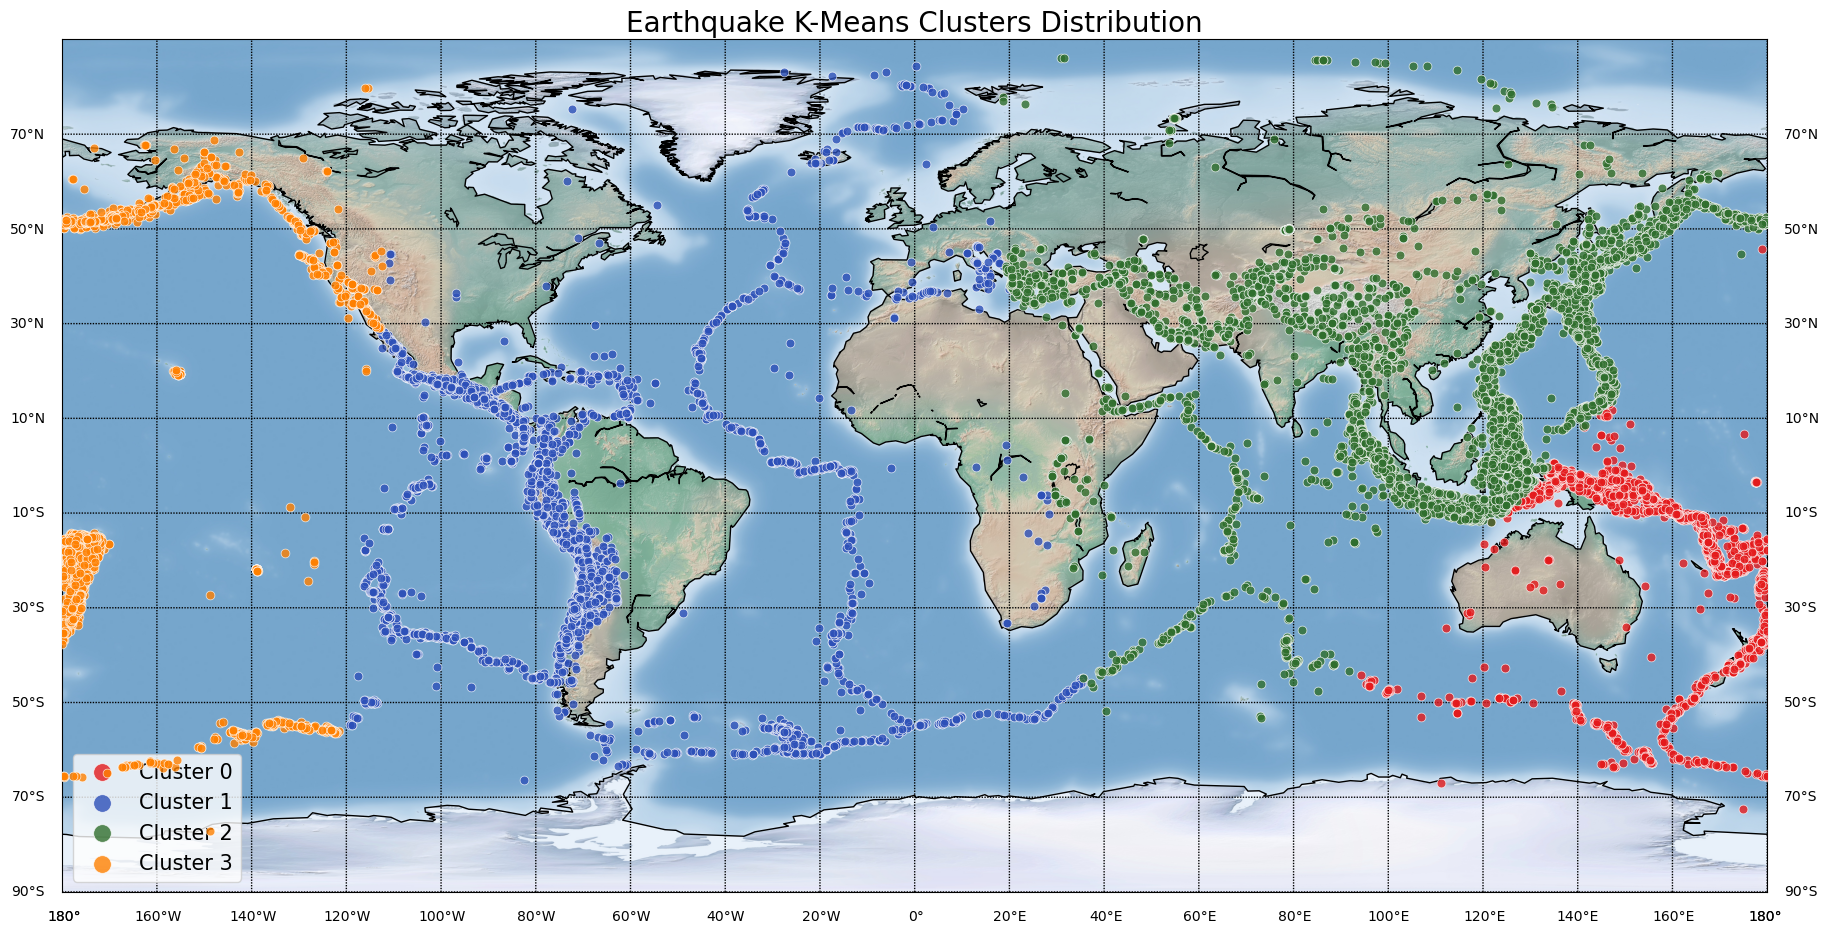

In [32]:
# 设置画布大小
fig = plt.figure(figsize=(22, 20))

# 1. 初始化地图
wmap = Basemap()
wmap.drawcoastlines()
wmap.shadedrelief()
wmap.drawparallels(np.arange(-90, 90, 20), labels=[1, 1, 0, 1])
wmap.drawmeridians(np.arange(-180, 180, 20), labels=[1, 1, 0, 1])

plt.title('Earthquake K-Means Clusters Distribution', fontsize=20)

# 2. 定义颜色映射
# 0: Red, 1: Blue, 2: Orange, 3: Black
colors_map = {0: '#E41A1C', # 鲜红
    1: "#2D50B8", # 蓝
    2: "#2F6E2D", # 绿
    3: "#FF8000BE"  # 橙
    }

# 3. 循环绘制每一类
for i in range(4):
    # 筛选出当前类别的数据
    subset = cluster_stats[cluster_stats['Cluster'] == i]
    
    # 提取经纬度并转换坐标
    longitudes = subset['Longitude'].tolist()
    latitudes = subset['Latitude'].tolist()
    x, y = wmap(longitudes, latitudes)
    
    # 绘制散点
    wmap.scatter(x, y, 
                 s=40,                   # 点的大小
                 c=colors_map[i],        # 颜色
                 label=f'Cluster {i}',   # 图例标签
                 alpha=0.8,              # 透明度，防止点太密集完全遮挡
                 edgecolors='white',     # 白色边框增加对比度
                 linewidths=0.5,
                 zorder=10)

# 4. 添加图例
plt.legend(loc='lower left', fontsize=15, markerscale=2, frameon=True, framealpha=0.8)

plt.show()

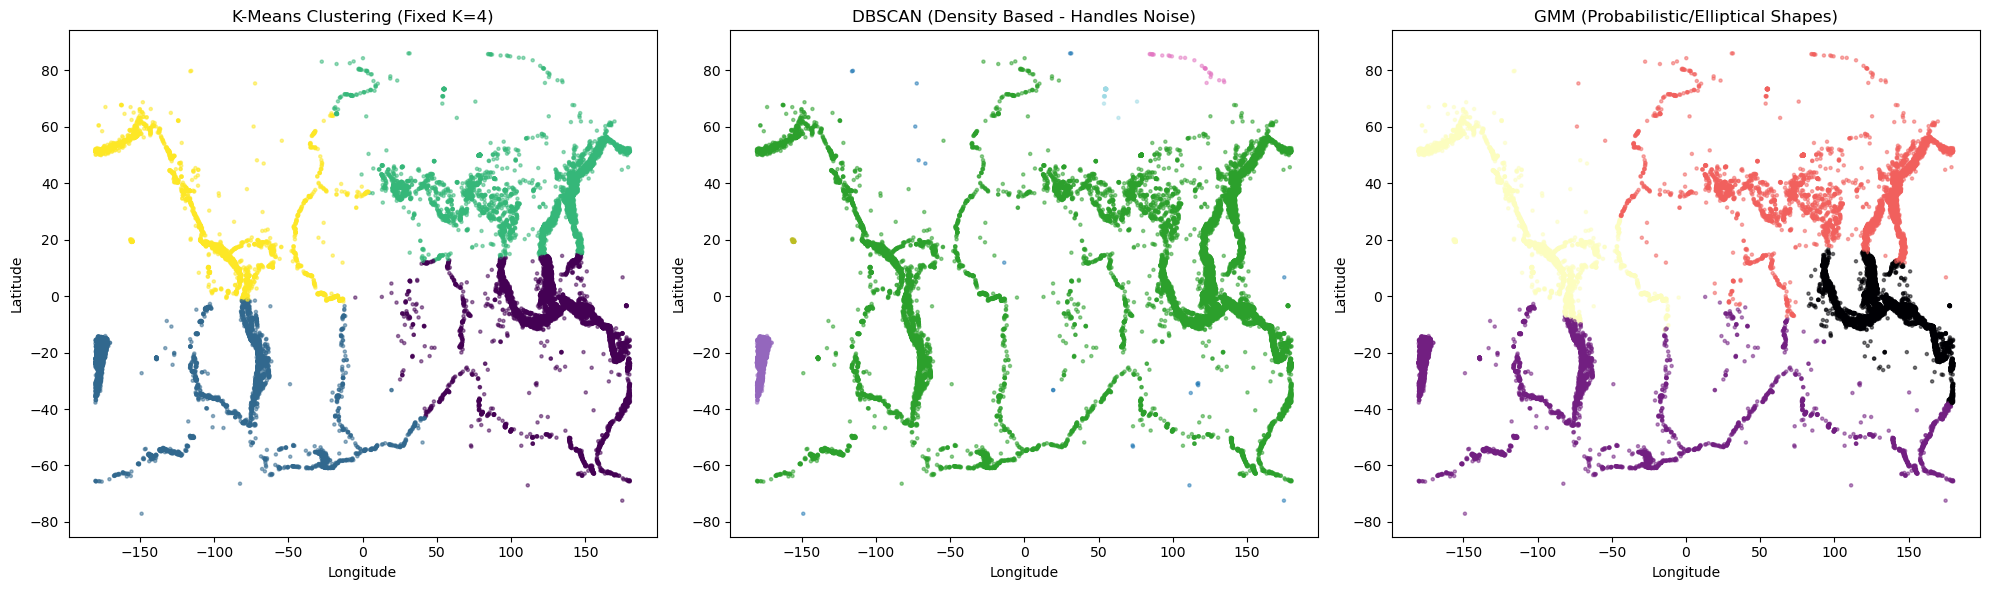

聚类方法对比总结：
K-Means 簇数量: 4
DBSCAN 簇数量: 5 (不含噪声)
DBSCAN 识别出的噪声点数量: 21


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# 1. 模拟/加载数据 (以经纬度为主)
# 假设 df 已经包含了预处理后的 'Latitude' 和 'Longitude'
# 这里使用 StandardScaler 归一化，因为经纬度量级一致，但在聚类中标准化是好习惯
features = ['Longitude', 'Latitude']
X = df[features]
X_scaled = StandardScaler().fit_transform(X)

# --- 方法 1: K-Means (基准) ---
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Labels'] = kmeans.fit_predict(X_scaled)

# --- 方法 2: DBSCAN (对比点：形状适应性 & 噪声) ---
# eps 是邻域半径，min_samples 是形成簇所需的最少点数
# 对于地理数据，eps 的选择非常关键
dbscan = DBSCAN(eps=0.2, min_samples=10) 
df['DBSCAN_Labels'] = dbscan.fit_predict(X_scaled)

# --- 方法 3: GMM (对比点：概率分布 & 椭圆形状) ---
gmm = GaussianMixture(n_components=4, random_state=42)
df['GMM_Labels'] = gmm.fit_predict(X_scaled)

# 2. 可视化对比分析
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# K-Means 图
axes[0].scatter(df['Longitude'], df['Latitude'], c=df['KMeans_Labels'], cmap='viridis', s=5, alpha=0.5)
axes[0].set_title('K-Means Clustering (Fixed K=4)')

# DBSCAN 图import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# 假设您的数据框为 df，包含 'Longitude' 和 'Latitude'
# 提取特征
X = df[['Longitude', 'Latitude']]

# 标准化处理（聚类算法对量纲敏感，必须执行）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 注意：DBSCAN 中标签为 -1 的点是噪声点，通常设为黑色或灰色
colors = df['DBSCAN_Labels'].map(lambda x: 'black' if x == -1 else plt.cm.viridis(x / df['DBSCAN_Labels'].max()))
axes[1].scatter(df['Longitude'], df['Latitude'], c=df['DBSCAN_Labels'], cmap='tab20', s=5, alpha=0.5)
axes[1].set_title('DBSCAN (Density Based - Handles Noise)')

# GMM 图
axes[2].scatter(df['Longitude'], df['Latitude'], c=df['GMM_Labels'], cmap='magma', s=5, alpha=0.5)
axes[2].set_title('GMM (Probabilistic/Elliptical Shapes)')

for ax in axes:
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

# 3. 输出对比总结
print("聚类方法对比总结：")
print(f"K-Means 簇数量: {len(df['KMeans_Labels'].unique())}")
print(f"DBSCAN 簇数量: {len(df[df['DBSCAN_Labels'] != -1]['DBSCAN_Labels'].unique())} (不含噪声)")
print(f"DBSCAN 识别出的噪声点数量: {len(df[df['DBSCAN_Labels'] == -1])}")